In [135]:
import pandas as pd
import configparser
import requests as req
pd.set_option('display.max_colwidth',140)
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [136]:
# bring in the information about all resources on data.austintexas.gov as of 3 Oct 2016; 
# file source = socrata resource for admins called "Dataset of Datasets", accessed 3 Oct 2016
# create a dataframe
df = pd.read_csv('all_views_20161003.csv')
df.head(3)


,Keywords,Domain,Last Update Date (data),Downloads,U ID,Description,Creation Date,Visits,Name,ContactEmail,Owner,Category,Type,Frequency,Department,Derived View
0,"searchs,top 10,austintexas.gov,website",data.austintexas.gov,09/06/2016 07:30:50 PM +0000,312,q37s-pqpu,This represents the top 10 searches that visitors have conducted on www.austintexas.gov. The Number of Queries is calculated by Unique P...,05/01/2013 04:20:33 PM +0000,106515,Top-10-Searches-Chart,NaN,AustinGo,Government,chart,Monthly,Other,True
1,"dog,dogs,pet,off-leash,areas,area",data.austintexas.gov,NaN,307,iyf6-bziq,This is a map of off-leash areas for dogs.,05/30/2013 02:58:20 PM +0000,59645,Off- Leash Areas,NaN,AustinGo,Fun,map,As Needed,Parks & Recreaction,False
2,"cat,dog,pet,stray,austin animal center,no kill,data,open government,map",data.austintexas.gov,10/01/2016 09:02:09 PM +0000,350,hye6-gvq2,This map shows all stray cats and dogs that are currently listed in AAC's database for no longer than a week. Most will be located at AA...,06/24/2014 08:59:11 PM +0000,53783,Austin Animal Center Found Pets Map,NaN,Austin Animal Center,Government,map,As Needed,Animal Services,True


In [137]:
# check on the number of records in the file
print("The number of Socrata resources in this file is \n{}.".format(df.count()))

The number of Socrata resources in this file is 
Keywords                    969
Domain                     1457
Last Update Date (data)    1200
Downloads                  1457
U ID                       1457
Description                1149
Creation Date              1457
Visits                     1457
Name                       1457
ContactEmail                  0
Owner                      1457
Category                    982
Type                       1457
Frequency                  1124
Department                 1089
Derived View               1457
dtype: int64.


In [138]:
# take a look at the values available in the Type column
df['Type'].unique()


array(['chart', 'map', 'table', 'data_lens', 'calendar', 'filter/grouped',
       'external dataset', 'story', 'blob'], dtype=object)

In [139]:
# an example of what's in a record
df.columns.tolist()


['Keywords',
 'Domain',
 'Last Update Date (data)',
 'Downloads',
 'U ID',
 'Description',
 'Creation Date',
 'Visits',
 'Name',
 'ContactEmail',
 'Owner',
 'Category',
 'Type',
 'Frequency',
 'Department',
 'Derived View']

In [140]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 16 columns):
Keywords                   969 non-null object
Domain                     1457 non-null object
Last Update Date (data)    1200 non-null object
Downloads                  1457 non-null int64
U ID                       1457 non-null object
Description                1149 non-null object
Creation Date              1457 non-null object
Visits                     1457 non-null int64
Name                       1457 non-null object
ContactEmail               0 non-null float64
Owner                      1457 non-null object
Category                   982 non-null object
Type                       1457 non-null object
Frequency                  1124 non-null object
Department                 1089 non-null object
Derived View               1457 non-null bool
dtypes: bool(1), float64(1), int64(2), object(12)
memory usage: 172.2+ KB


In [141]:
#so we can drop ContactEmail (no data)
df.drop(labels=['ContactEmail'], inplace=True, axis=1)
df.columns


Index(['Keywords', 'Domain', 'Last Update Date (data)', 'Downloads', 'U ID',
       'Description', 'Creation Date', 'Visits', 'Name', 'Owner', 'Category',
       'Type', 'Frequency', 'Department', 'Derived View'],
      dtype='object')

In [142]:
# we want to filter out the resources that aren't tables. And we don't want derived views. 

only_tables = df[(df.Type == 'table') &
   (df['Derived View']==False) &
    (df.Domain=='data.austintexas.gov')].copy(deep=True)
only_tables


,Keywords,Domain,Last Update Date (data),Downloads,U ID,Description,Creation Date,Visits,Name,Owner,Category,Type,Frequency,Department,Derived View
4,NaN,data.austintexas.gov,08/19/2016 01:43:19 PM +0000,7456,b4y9-5x39,Please read and understand the following information.; ; Understanding the following conditions will allow you to get the most out of th...,12/16/2011 03:53:22 PM +0000,31378,APD Incident Extract YTD,opendataatx,Public Safety,table,Daily,Austin Police,False
5,"restaurant,geodata,health,fdhealth",data.austintexas.gov,09/28/2016 02:26:49 PM +0000,6118,ecmv-9xxi,Provides restaurant scores for inspections performed within the last three years. Online search of this data set also available at: http...,12/13/2011 06:47:37 PM +0000,23903,Restaurant Inspection Scores,opendataatx,NaN,table,Weekly,Health and Human Services,False
7,"unclaimed,property,unclaimed property",data.austintexas.gov,10/21/2015 08:47:08 PM +0000,6277,h3i4-5e5v,Visit: https://www.ci.austin.tx.us/financeonline/finance/financial_docs.cfm?ws=3&pg=1 for information if you find your name on the list....,05/21/2012 05:48:27 PM +0000,15836,Unclaimed Property,opendataatx,Financial,table,As Needed,Financial Services,False
8,"water quality,eii,ali,barton springs,lady bird lake,lake austin,salamanders,barton creek,bull creek,bacteria,coli",data.austintexas.gov,09/08/2016 07:17:32 PM +0000,1781,5tye-7ray,"Data collected to assess water quality conditions in the natural creeks, aquifers and lakes in the Austin area. This is raw data, provid...",01/03/2012 02:55:34 PM +0000,9802,Water Quality Sampling Data,Rob,Environmental,table,Quarterly,Watershed Protection,False
10,"community registry,neighborhood registry,community,neighborhood",data.austintexas.gov,09/06/2016 07:13:51 PM +0000,1242,u3yy-shmz,This is a monthly upload of the Community Registry. Neighborhood groups register with the City of Austin to receive notices of developme...,05/09/2013 09:21:54 PM +0000,13734,Austintexas.gov - Community Registry - Updated once a Month,AustinGo,NaN,table,Monthly,Public Information Office,False
11,"google analytics,austingo,hits,pageviews,statistics,analytics",data.austintexas.gov,05/03/2013 04:24:42 PM +0000,361,959k-a8yh,Google Analytics for austintexas.gov,09/26/2012 05:23:15 PM +0000,1585,Google Analytics for www.austintexas.gov,Divya Rathanlal,Government,table,Monthly,Communication and Technology Management,False
14,"311,3-1-1,csr,sr,service request,service requests,austin311,austin 311",data.austintexas.gov,10/03/2016 02:50:23 AM +0000,4509,i26j-ai4z,Data collected from CSR production system. ; Data begins 01/03/2014 and is refreshed every half-hour; For more info: http://austintexas....,12/30/2013 07:11:01 PM +0000,8008,311 Unified Data,Austin 311,Government,table,Daily,Austin Energy,False
16,"municipal,court,violation",data.austintexas.gov,07/23/2014 10:00:40 PM +0000,1704,8jyt-x94k,This data is provided to help with analysis of various violations charged throughout the City of Austin. See Fiscal Year datasets for ne...,02/28/2012 10:02:38 PM +0000,7690,"Municipal Court Caseload Information **Dataset removal in 2 months on September 1, 2014",Luz Lozano,Public Safety,table,Monthly,Municipal Court,False
17,"financial,echeckbook,checkbook,transparency,expenses,expenditures,finance,payment,checks,payments,city of austin",data.austintexas.gov,09/12/2016 12:07:59 PM +0000,839,8c6z-qnmj,Flat file data set of the data found in the Austin Finance Online eCheckbook application. The data contained in this dataset is for inf...,12/13/2011 09:37:13 PM +0000,5846,Austin Finance Online eCheckbook,Chris,Financial,table,Weekly,Financial Services,False
23,"civic,projects,go,general obligation,capital,improvement,visualization,information,communication,planning",data.austintexas.gov,10/02/2016 12:00:38 PM +0000,723,e8fp-i3ts,This dataset includes information for projects that appear on the City of Austin’s Capital Improvement Visualization Information and Com...,10/17/2013 03:25:11 

In [143]:
# let's find out how many tables there are
len(only_tables)


363

In [144]:
#add a column for urls
urls = []
for x in only_tables['U ID']:
    urls.append('https://data.austintexas.gov/api/views/{}/metrics.json?start=1451606400000&end=1475539199999'.format(x))
only_tables['metrics_urls']=urls
only_tables.head()

,Keywords,Domain,Last Update Date (data),Downloads,U ID,Description,Creation Date,Visits,Name,Owner,Category,Type,Frequency,Department,Derived View,metrics_urls
4,NaN,data.austintexas.gov,08/19/2016 01:43:19 PM +0000,7456,b4y9-5x39,Please read and understand the following information.; ; Understanding the following conditions will allow you to get the most out of th...,12/16/2011 03:53:22 PM +0000,31378,APD Incident Extract YTD,opendataatx,Public Safety,table,Daily,Austin Police,False,https://data.austintexas.gov/api/views/b4y9-5x39/metrics.json?start=1451606400000&end=1475539199999
5,"restaurant,geodata,health,fdhealth",data.austintexas.gov,09/28/2016 02:26:49 PM +0000,6118,ecmv-9xxi,Provides restaurant scores for inspections performed within the last three years. Online search of this data set also available at: http...,12/13/2011 06:47:37 PM +0000,23903,Restaurant Inspection Scores,opendataatx,NaN,table,Weekly,Health and Human Services,False,https://data.austintexas.gov/api/views/ecmv-9xxi/metrics.json?start=1451606400000&end=1475539199999
7,"unclaimed,property,unclaimed property",data.austintexas.gov,10/21/2015 08:47:08 PM +0000,6277,h3i4-5e5v,Visit: https://www.ci.austin.tx.us/financeonline/finance/financial_docs.cfm?ws=3&pg=1 for information if you find your name on the list....,05/21/2012 05:48:27 PM +0000,15836,Unclaimed Property,opendataatx,Financial,table,As Needed,Financial Services,False,https://data.austintexas.gov/api/views/h3i4-5e5v/metrics.json?start=1451606400000&end=1475539199999
8,"water quality,eii,ali,barton springs,lady bird lake,lake austin,salamanders,barton creek,bull creek,bacteria,coli",data.austintexas.gov,09/08/2016 07:17:32 PM +0000,1781,5tye-7ray,"Data collected to assess water quality conditions in the natural creeks, aquifers and lakes in the Austin area. This is raw data, provid...",01/03/2012 02:55:34 PM +0000,9802,Water Quality Sampling Data,Rob,Environmental,table,Quarterly,Watershed Protection,False,https://data.austintexas.gov/api/views/5tye-7ray/metrics.json?start=1451606400000&end=1475539199999
10,"community registry,neighborhood registry,community,neighborhood",data.austintexas.gov,09/06/2016 07:13:51 PM +0000,1242,u3yy-shmz,This is a monthly upload of the Community Registry. Neighborhood groups register with the City of Austin to receive notices of developme...,05/09/2013 09:21:54 PM +0000,13734,Austintexas.gov - Community Registry - Updated once a Month,AustinGo,NaN,table,Monthly,Public Information Office,False,https://data.austintexas.gov/api/views/u3yy-shmz/metrics.json?start=1451606400000&end=1475539199999


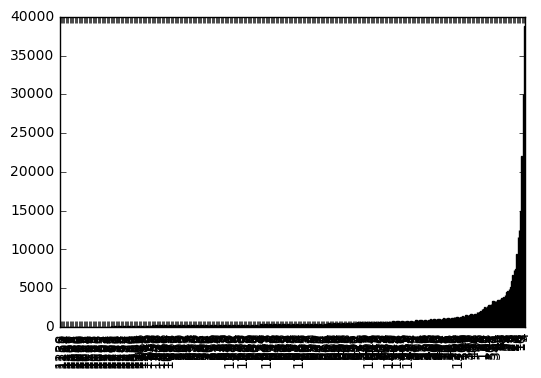

In [157]:
# Simple plot of Visits + Downloads.  This doesn't reveal complexity, necessity or structure.
pd.Series(only_tables.Visits+only_tables.Downloads).sort_values().plot(kind='bar')


## NOTE: After this other users won't be able to follow because of the password.  But I fixed these problems below with the filter I used above.

In [53]:
# get ready to call the Socrata API. don't store password in the notebook
config = configparser.ConfigParser()
config.read('secrets.txt')
user = config['socrata']['u']
password = config['socrata']['p']

# make the call for each url in the list. store each response in a dictionary
table_metrics_ytd = []
for u in only_tables.metrics_urls:
    t = {}
    r = req.get(u, auth=(user, password))
    i = u[39:48]
    l = 'https://data.austintexas.gov/d/' + i
    f = {'fetched_url': u, 'id': i, 'dataset_page_url': l}
    d = r.json()
    f.update(d)
    table_metrics_ytd.append(f)
print('made ' + str(len(table_metrics_ytd)) + ' api calls.')

KeyError: 'socrata'

In [14]:
# load the data we just got into a data frame and check it out
df2 = pd.DataFrame(table_metrics_ytd)
df2.columns

Index(['charts-created', 'charts-created-total', 'charts-deleted',
       'charts-deleted-total', 'code', 'comments-created',
       'comments-created-total', 'dataset_page_url', 'downloads',
       'downloads-total', 'embeds', 'embeds-total', 'error', 'fetched_url',
       'filters-created', 'filters-created-total', 'filters-deleted',
       'filters-deleted-total', 'govstat-metrics-using',
       'govstat-metrics-using-total', 'govstat-total-computes',
       'govstat-total-computes-total', 'id', 'maps-created',
       'maps-created-total', 'maps-deleted', 'maps-deleted-total', 'message',
       'visits', 'visits-total'],
      dtype='object')

In [19]:
# check to see if any url calls returned an error

df2['code'].unique()

array([nan, 'not_found'], dtype=object)

In [20]:
# rut-roh!

df2['message'].unique()

array([nan, 'Cannot find view with id fe74-agg3',
       'Cannot find view with id 8r2c-upwq',
       'Cannot find view with id xqf2-udyn',
       'Cannot find view with id 9r6u-h97f',
       'Cannot find view with id w4x7-gfja',
       'Cannot find view with id 7358-krk7',
       'Cannot find view with id daek-f7x4',
       'Cannot find view with id avj9-39zb',
       'Cannot find view with id jir8-be2g',
       'Cannot find view with id uhvc-ynxd',
       'Cannot find view with id bc5r-88dy',
       'Cannot find view with id 5nzk-szvg',
       'Cannot find view with id ezdt-euam',
       'Cannot find view with id qs9r-eh8x',
       'Cannot find view with id m5q4-3y3d',
       'Cannot find view with id 4kje-y9af',
       'Cannot find view with id p7kc-wkbc',
       'Cannot find view with id tqgd-mf4x',
       'Cannot find view with id ywgb-2ig8',
       'Cannot find view with id qyst-3472',
       'Cannot find view with id 3zr8-huug',
       'Cannot find view with id karz-jr5v',
     

In [21]:
# how many datasets returned an error?
df2[['code', 'id']][df2['code'] == 'not_found'].groupby('code').count()

,id
code,
not_found,80


In [24]:
# make a list of them

df2[['id']][df2['code'] == 'not_found'].values


array([['fe74-agg3'],
       ['8r2c-upwq'],
       ['xqf2-udyn'],
       ['9r6u-h97f'],
       ['w4x7-gfja'],
       ['7358-krk7'],
       ['daek-f7x4'],
       ['avj9-39zb'],
       ['jir8-be2g'],
       ['uhvc-ynxd'],
       ['bc5r-88dy'],
       ['5nzk-szvg'],
       ['ezdt-euam'],
       ['qs9r-eh8x'],
       ['m5q4-3y3d'],
       ['4kje-y9af'],
       ['p7kc-wkbc'],
       ['tqgd-mf4x'],
       ['ywgb-2ig8'],
       ['qyst-3472'],
       ['3zr8-huug'],
       ['karz-jr5v'],
       ['ez4t-k8n4'],
       ['36qt-hi3h'],
       ['fhx8-fyu2'],
       ['yisx-jwus'],
       ['y5qk-ycha'],
       ['uf4q-4zh3'],
       ['put4-j4ni'],
       ['mkfw-xvtp'],
       ['kzja-82u7'],
       ['jady-amz8'],
       ['555q-48w2'],
       ['vimt-emci'],
       ['nywn-y4pr'],
       ['d4m6-5bq8'],
       ['qjby-4sji'],
       ['342j-aqe3'],
       ['ajmb-qjqw'],
       ['e68g-thne'],
       ['p4g8-g35g'],
       ['qz79-qws3'],
       ['wj3f-puun'],
       ['7tg6-n9nk'],
       ['axjn-4unb'],
       ['q

In [26]:
# it looks like our admin "dataset of datasets" includes resources that we federate from other places

df['Domain'].unique()

array(['data.austintexas.gov', 'data.texas.gov'], dtype=object)

In [30]:
# let's see if the number of state datasets matches the number of errors we encountered

a = df[['U ID', 'Type', 'Domain']][df['Type'] == 'table'][df['Domain'] == 'data.texas.gov']
state_table_ids = a['U ID'].values
print(len(state_table_ids)) # 79 makes sense

79


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [35]:
# now let's drop those results out of our dataframe

atx_table_metrics_ytd = []
for i in table_metrics_ytd:
    if i['id'] not in state_table_ids:
        atx_table_metrics_ytd.append(i)
len(atx_table_metrics_ytd) + len(state_table_ids) == len(table_metrics_ytd) # it all adds up! hooray

True

In [36]:
# write the city metrics to a csv so more people can explore them

x = atx_table_metrics_ytd
keys = df2.columns
with open('table_metrics_ytd.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(x)